Data Integration

Now, the next step is to combine data from different sources to get a unified structure with more meaningful and valuable information. This is mostly used if the data is segregated into different sources. To make it simple, let's assume we have data in CSV format in different places, all talking about the same scenario. Say we have some data about an employee in a database. We can't expect all the data about the employee to reside in the same table. It's possible that the employee's personal data will be located in one table, the employee's project history will be in a second table, the employee's time-in and time-out details will be in another table, and so on. So, if we want to do some analysis about the employee, we need to get all the employee data in one common place. This process of bringing data together in one place is called data integration. To do data integration, we can merge multiple pandas DataFrames using the merge function.

In [ ]:
import pandas as pd

dataset1 = "/content/student.csv"

dataset2 = "/content/mark.csv"

df1 = pd.read_csv(dataset1, header = 0)

df2 = pd.read_csv(dataset2, header = 0)

Integrating Data
In this exercise, we'll merge the details of students from two datasets, namely student.csv and marks.csv. The student dataset contains columns such as Age, Gender, Grade, and Employed. The marks.csv dataset contains columns such as Mark and City. The Student_id column is common between the two datasets. Follow these steps to complete this exercise:

In [ ]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


Student_id is common to both datasets. Perform data integration on both the DataFrames with respect to the Student_id column using the pd.merge() function, and then print the first 10 values of the new DataFrame:

In [ ]:
df = pd.merge(df1, df2, on = 'Student_id')

df.head(10)

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


Here, the data of the df1 DataFrame is merged with the data of the df2 DataFrame. The merged data is stored inside a new DataFrame called df.

**Data Transformation**
Previously, we saw how we can combine data from different sources into a unified dataframe. Now, we have a lot of columns that have different types of data. Our goal is to transform the data into a machine-learning-digestible format. All machine learning algorithms are based on mathematics. So, we need to convert all the columns into numerical format. Before that, let's see all the different types of data we have.

Taking a broader perspective, data is classified into numerical and categorical data:

Numerical: As the name suggests, this is numeric data that is quantifiable.
Categorical: The data is a string or non-numeric data that is qualitative in nature.

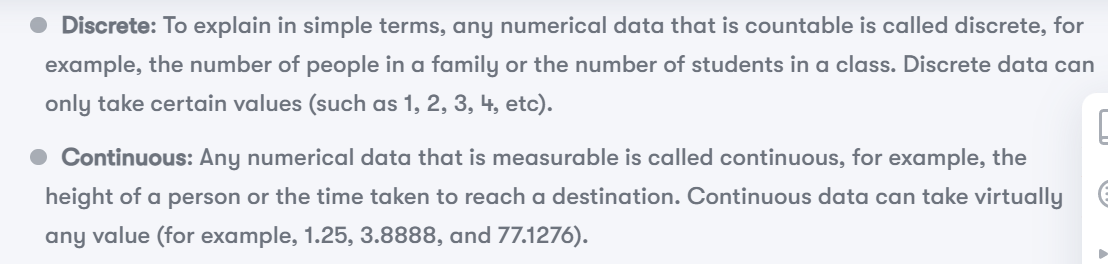


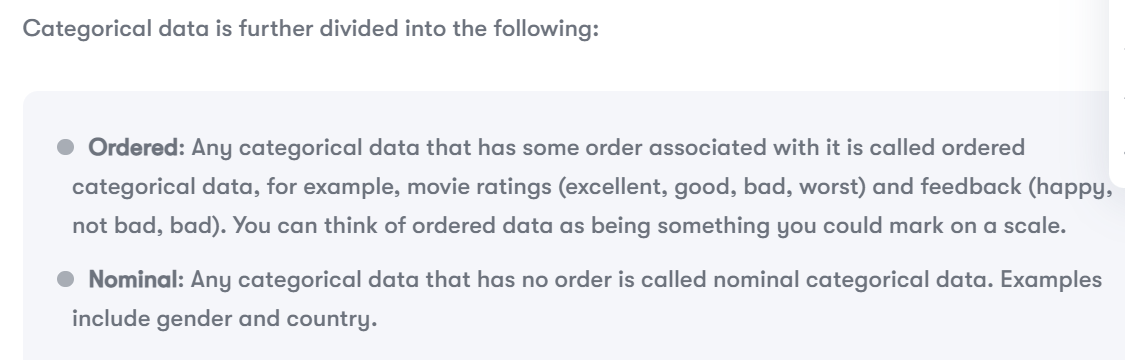


Simple Replacement of Categorical Data with a Number

In [ ]:
import pandas as pd

import numpy as np

dataset = "/content/student.csv"

df = pd.read_csv(dataset, header = 0)

Find the categorical column and separate it out with a different dataframe. To do so, use the select_dtypes() function from pandas:

In [ ]:
df_categorical = df.select_dtypes(exclude=[np.number])

df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


Find the distinct unique values in the Grade column. To do so, use the unique() function from pandas with the column name:

In [ ]:
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

Find the frequency distribution of each categorical column. To do so, use the value_counts() function on each column. This function returns the counts of unique values in an object:
df_categorical.Grade.value_counts()

In [ ]:
df_categorical.Grade.value_counts()

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

For the Gender column, write the following code:
df_categorical.Gender.value_counts()

In [ ]:
df_categorical.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

Similarly, for the Employed column, write the following code:


In [ ]:
df_categorical.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

Replace the entries in the Grade column. Replace 1st class with 1, 2nd class with 2, and 3rd class with 3. To do so, use the replace() function:




In [ ]:
df_categorical.Grade.replace({"1st Class":1, "2nd Class":2, "3rd Class":3}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Replace the entries in the Gender column. Replace Male with 0 and Female with 1. To do so, use the replace() function:
df_categorical.Gender.replace({"Male":0,"Female":1}, inplace= True)



In [ ]:
df_categorical.Gender.replace({"Male":0,"Female":1}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Replace the entries in the Employed column. Replace no with 0 and yes with 1. To do so, use the replace() function:
df_categorical.Employed.replace({"yes":1,"no":0}, inplace = True)

In [ ]:
df_categorical.Employed.replace({"yes":1,"no":0}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_categorical.head(10)

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0
5,0,2,1
6,1,3,1
7,0,3,1
8,1,3,1
9,0,1,0


You have successfully converted the categorical data to numerical data using a simple manual replacement method. We will now move on to look at another method of encoding categorical data

Label Encoding

This is a technique in which we replace each value in a categorical column with numbers from 0 to N-1. For example, say we've got a list of employee names in a column. After performing label encoding, each employee name will be assigned a numeric label. But this might not be suitable for all cases because the model might consider numeric values to be weights assigned to the data. Label encoding is the best method to use for ordinal data. The scikit-learn library provides LabelEncoder(), which helps with label encoding. Let's look at an exercise in the next section.

Converting Categorical Data to Numerical Data Using Label Encoding
In this exercise, we will load the Banking_Marketing.csv dataset into a pandas dataframe and convert categorical data to numeric data using label encoding.

In [ ]:
import pandas as pd

import numpy as np

dataset = '/content/Banking_Marketing.csv'

df = pd.read_csv(dataset, header=0)

In [ ]:
df = df.dropna()

In [ ]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [ ]:
#import the LabelEncoder class

from sklearn.preprocessing import LabelEncoder

#Creating the object instance

label_encoder = LabelEncoder()

for i in data_column_category:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,210.0,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,138.0,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,339.0,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,185.0,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,137.0,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


One-Hot Encoding


In label encoding, categorical data is converted to numerical data, and the values are assigned labels (such as 1, 2, and 3). Predictive models that use this numerical data for analysis might sometimes mistake these labels for some kind of order (for example, a model might think that a label of 3 is "better" than a label of 1, which is incorrect). In order to avoid this confusion, we can use one-hot encoding. Here, the label-encoded data is further divided into n number of columns. Here, n denotes the total number of unique labels generated while performing label encoding. For example, say that three new labels are generated through label encoding. Then, while performing one-hot encoding, the columns will be divided into three parts. So, the value of n is 3. Let's look at an exercise to get further clarification.

In [ ]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import OneHotEncoder

dataset = '/content/Banking_Marketing.csv'

#reading the data into the dataframe into the object data

df = pd.read_csv(dataset, header=0)

In [ ]:
df = df.dropna()

In [ ]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [ ]:
#performing label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,210.0,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,138.0,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,339.0,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,185.0,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,137.0,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


Once we have performed label encoding, we execute one-hot encoding. Add the following code to implement this:
#Performing Onehot Encoding

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

Now we create a new dataframe with the encoded data and print the first five rows. Add the following code to do this:
#Creating a dataframe with encoded data with new column name

In [ ]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2,contact_0,contact_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Due to one-hot encoding, the number of columns in the new dataframe has increased. In order to view and print all the columns created, use the columns attribute:

In [ ]:
onehot_encoded_frame.columns

Index(['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1',
       'marital_2', 'marital_3', 'education_0', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'default_0', 'default_1', 'default_2', 'housing_0',
       'housing_1', 'housing_2', 'loan_0', 'loan_1', 'loan_2', 'contact_0',
       'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')